# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [23]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2914 files belonging to 8 classes.


### Validation Image Preprocessing

In [24]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 748 files belonging to 8 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [25]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [32]:
cnn.add(tf.keras.layers.Flatten())

In [33]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [34]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [35]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=8,activation='softmax'))

### Compiling and Training Phase

In [36]:
import tensorflow as tf

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │        12,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,797,732 (29.75 MB)

 Trainable params: 7,797,732 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.7470 - loss: 0.6788 - val_accuracy: 0.3382 - val_loss: 1.9842
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.7457 - loss: 0.6717 - val_accuracy: 0.4733 - val_loss: 1.4943
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.7654 - loss: 0.6208 - val_accuracy: 0.4305 - val_loss: 1.9440
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.7733 - loss: 0.6733 - val_accuracy: 0.4505 - val_loss: 1.9332
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8586 - loss: 0.3913 - val_accuracy: 0.4318 - val_loss: 2.4035
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.8849 - loss: 0.3213 - val_accuracy: 0.4693 - val_loss: 2.2079
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.8927 - loss: 0.2853 - val_accuracy: 0.4599 - val_loss: 2.4887
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.8824 - loss: 0.3523 - val_accuracy: 0.4626 - v

## Evaluating Model

In [41]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

92/92 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9998 - loss: 3.9784e-04
Training accuracy: 0.9996568560600281


In [42]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 903ms/step - accuracy: 0.5107 - loss: 3.2117
Validation accuracy: 0.5133689641952515


### Saving Model

In [44]:
cnn.save('trained_plant_disease_model.keras')

In [24]:
training_history.history #Return Dictionary of history

{'accuracy': [0.9333949685096741,
  0.9521872401237488,
  0.9618322849273682,
  0.9705811142921448,
  0.9743794202804565],
 'loss': [0.2043437957763672,
  0.14836503565311432,
  0.11581307649612427,
  0.09068033844232559,
  0.07989315688610077],
 'val_accuracy': [0.9408149123191833,
  0.9435465335845947,
  0.9648873209953308,
  0.9627248048782349,
  0.9572046399116516],
 'val_loss': [0.18374428153038025,
  0.18323782086372375,
  0.1117737889289856,
  0.11962807178497314,
  0.14840169250965118]}

In [45]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [46]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

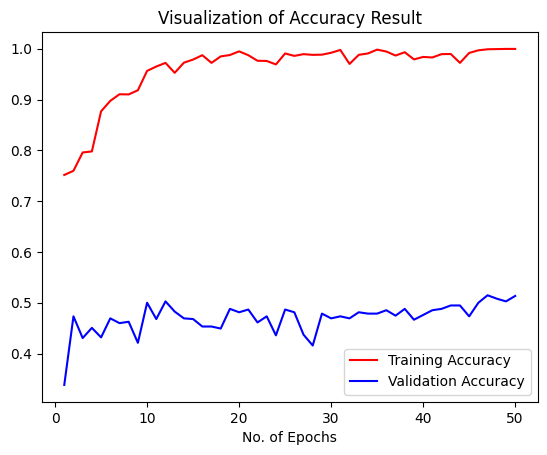

In [48]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [49]:
class_name = validation_set.class_names

In [50]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 748 files belonging to 8 classes.


In [51]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

748/748 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step


In [52]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [53]:
Y_true

<tf.Tensor: shape=(748,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [54]:
predicted_categories

<tf.Tensor: shape=(748,), dtype=int64, numpy=
array([7, 2, 2, 7, 2, 0, 7, 7, 2, 2, 0, 7, 7, 2, 0, 0, 0, 0, 0, 2, 7, 7,
       2, 7, 5, 2, 2, 5, 7, 3, 7, 7, 7, 7, 6, 0, 5, 2, 2, 1, 2, 0, 0, 2,
       0, 7, 6, 2, 7, 6, 3, 3, 2, 2, 0, 2, 5, 0, 0, 0, 6, 2, 2, 0, 5, 7,
       6, 7, 7, 7, 2, 6, 6, 0, 2, 0, 7, 2, 5, 5, 0, 0, 6, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 5, 0, 0, 0, 7, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 3, 5,
       4, 2, 5, 2, 3, 5, 5, 3, 0, 5, 5, 2, 5, 2, 2, 5, 5, 2, 2, 5, 2, 7,
       7, 6, 2, 2, 2, 6, 2, 6, 6, 5, 6, 3, 2, 5, 5, 5, 2, 5, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 2, 0, 0, 7, 3, 2, 5, 2, 3, 0, 5, 0,
     

In [55]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [56]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

    Bacteria       0.61      0.41      0.49       116
  Dried Leaf       0.99      0.94      0.96       100
       Fungi       0.41      0.42      0.41       160
     Healthy       0.16      0.23      0.19        48
    Nematode       0.47      0.50      0.48        16
        Pest       0.42      0.41      0.42       128
 Phytopthora       0.56      0.56      0.56        80
       Virus       0.49      0.58      0.53       100

    accuracy                           0.51       748
   macro avg       0.51      0.51      0.51       748
weighted avg       0.53      0.51      0.52       748



### Confusion Matrix Visualization

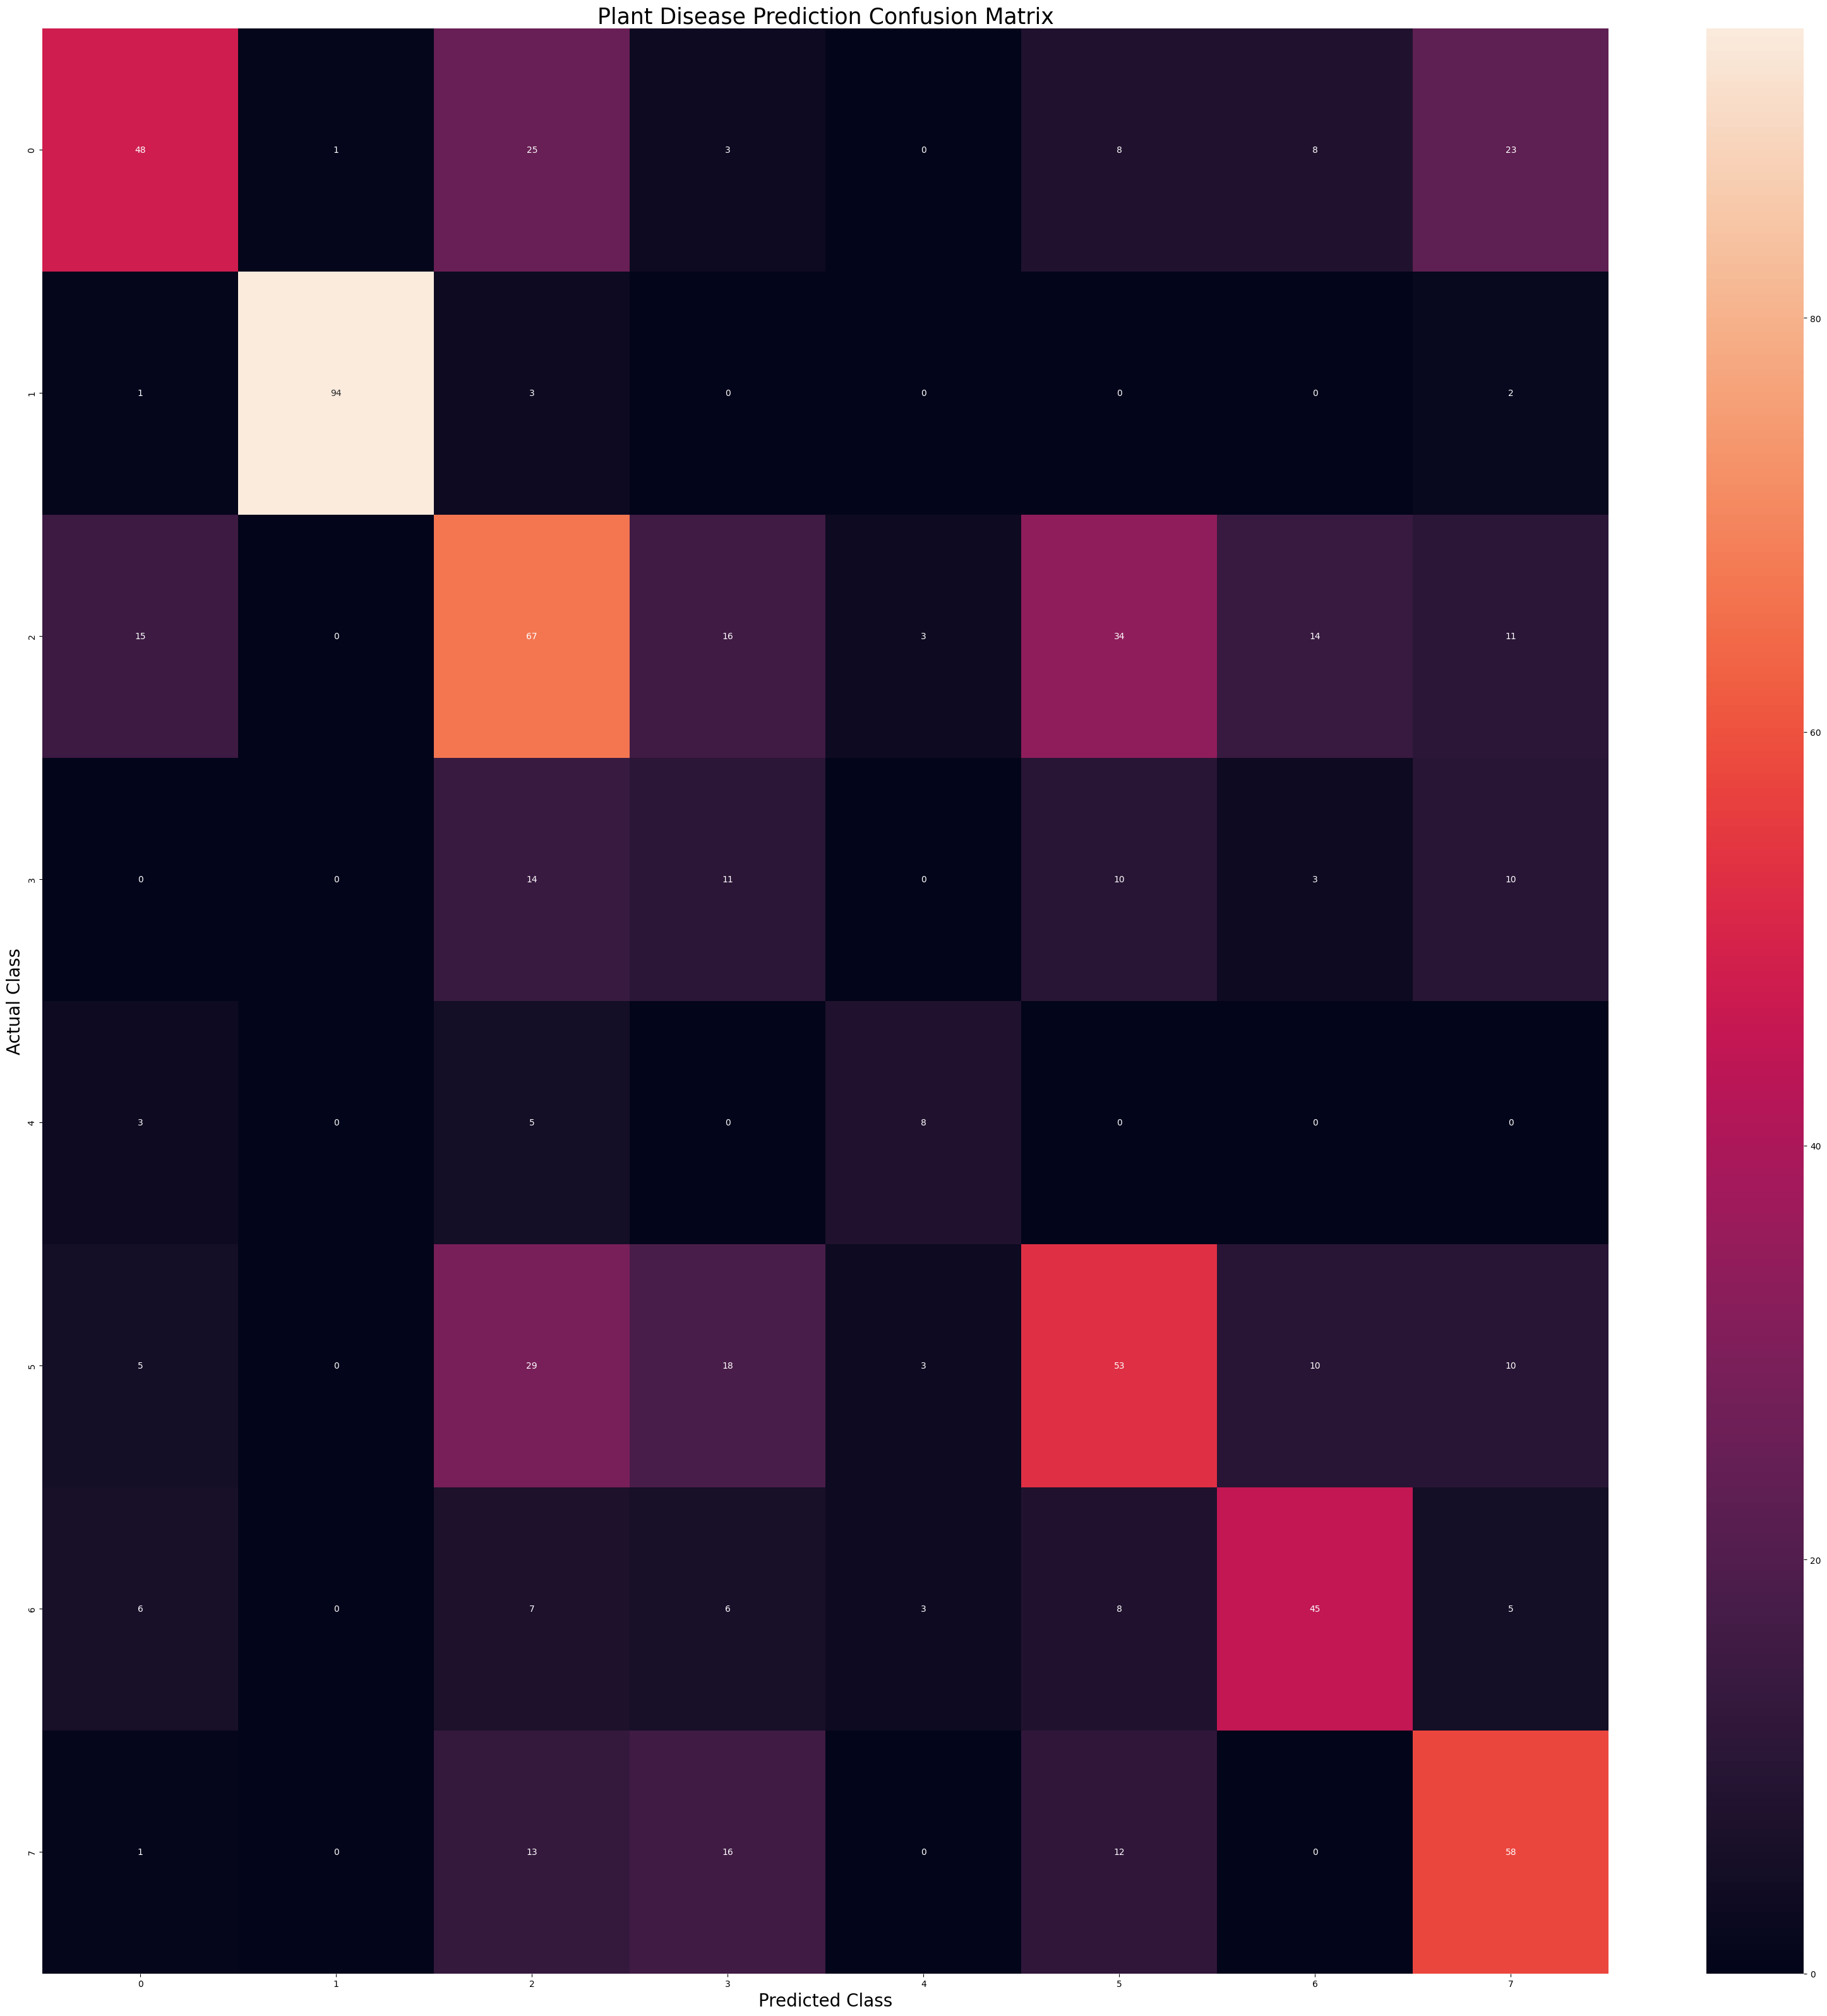

In [57]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()